 Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
import datetime

# Generate a sample dataset
np.random.seed(0)

# Define categories, payment methods, locations, merchants, and other data
categories = ["Groceries", "Entertainment", "Bills", "Transport", "Eating Out", "Healthcare"]
payment_methods = ["Cash", "Credit Card", "Debit Card", "Bank Transfer"]
locations = ["Supermarket", "Mall", "Online", "Restaurant", "Pharmacy", "Fuel Station"]
merchants = ["Walmart", "Amazon", "Starbucks", "Netflix", "Shell", "CVS"]
dates = pd.date_range(start="2022-01-01", end="2024-11-01", freq="D")

data = {
    "Transaction ID": range(1, 1001),
    "Date": np.random.choice(dates, 1000),
    "Amount": np.random.uniform(5, 200, 1000).round(2),
    "Category": np.random.choice(categories, 1000),
    "Payment Method": np.random.choice(payment_methods, 1000),
    "Location": np.random.choice(locations, 1000),
    "Merchant": np.random.choice(merchants, 1000),
    "Description": np.random.choice(
        [
            "Weekly groceries",
            "Dinner with friends",
            "Monthly subscription",
            "Bus fare",
            "Doctor's visit",
            "Gas refill",
            "Movie night",
            "Gift shopping",
        ],
        1000,
    ),
}

# Create DataFrame
df = pd.DataFrame(data)

# Add extra calculated fields
df["Transaction Type"] = df["Category"].apply(
    lambda x: "Fixed" if x in ["Bills", "Healthcare"] else "Variable"
)
df["Day of Week"] = df["Date"].dt.day_name()

# Save dataset
df.to_csv("enhanced_personal_expense_data.csv", index=False)
df.head()


,Transaction ID,Date,Amount,Category,Payment Method,Location,Merchant,Description,Transaction Type,Day of Week
0,1,2023-11-16,94.06,Groceries,Bank Transfer,Pharmacy,Shell,Dinner with friends,Variable,Thursday
1,2,2023-07-14,9.09,Bills,Credit Card,Supermarket,CVS,Weekly groceries,Fixed,Friday
2,3,2024-04-15,85.27,Bills,Credit Card,Fuel Station,Amazon,Doctor's visit,Fixed,Monday
3,4,2024-02-03,100.44,Transport,Debit Card,Online,Shell,Doctor's visit,Variable,Saturday
4,5,2024-10-30,52.52,Groceries,Credit Card,Restaurant,Amazon,Dinner with friends,Variable,Wednesday


Step 2: Data Management and Cleaning

Missing values per column:
 Transaction ID      0
Date                0
Amount              0
Category            0
Payment Method      0
Location            0
Merchant            0
Description         0
Transaction Type    0
Day of Week         0
dtype: int64

Data Types:
 Transaction ID               int64
Date                datetime64[ns]
Amount                     float64
Category                    object
Payment Method              object
Location                    object
Merchant                    object
Description                 object
Transaction Type            object
Day of Week                 object
dtype: object

Summary Statistics:
        Transaction ID                        Date       Amount
count     1000.000000                        1000  1000.000000
mean       500.500000  2023-05-30 20:44:09.600000   104.655090
min          1.000000         2022-01-01 00:00:00     5.070000
25%        250.750000         2022-09-15 00:00:00    54.900000
50%        500.500000   

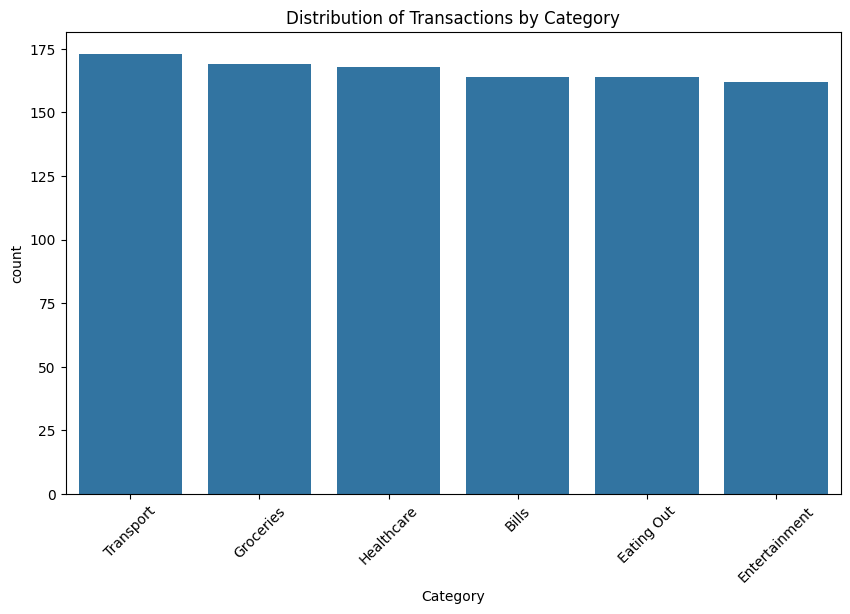

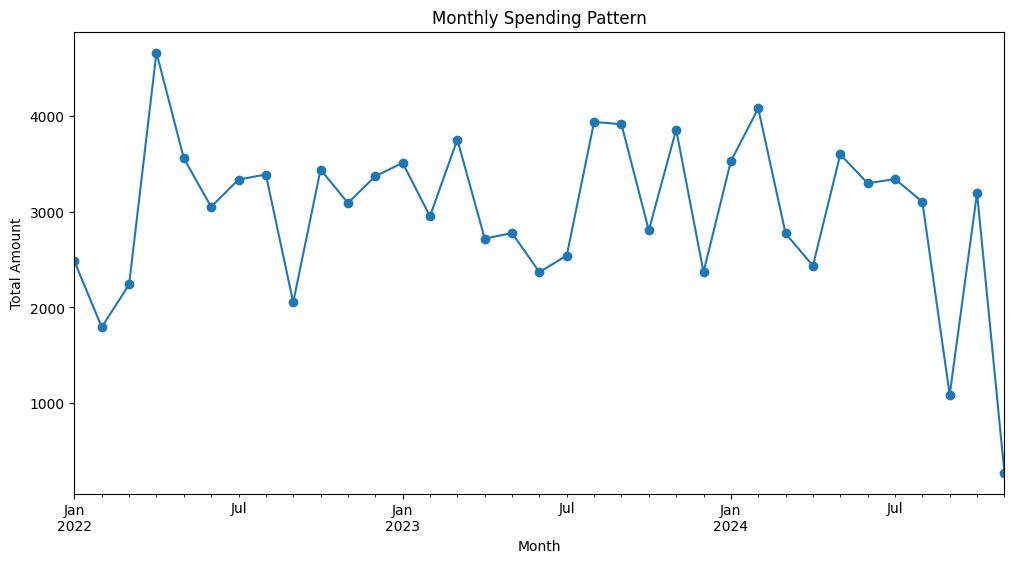

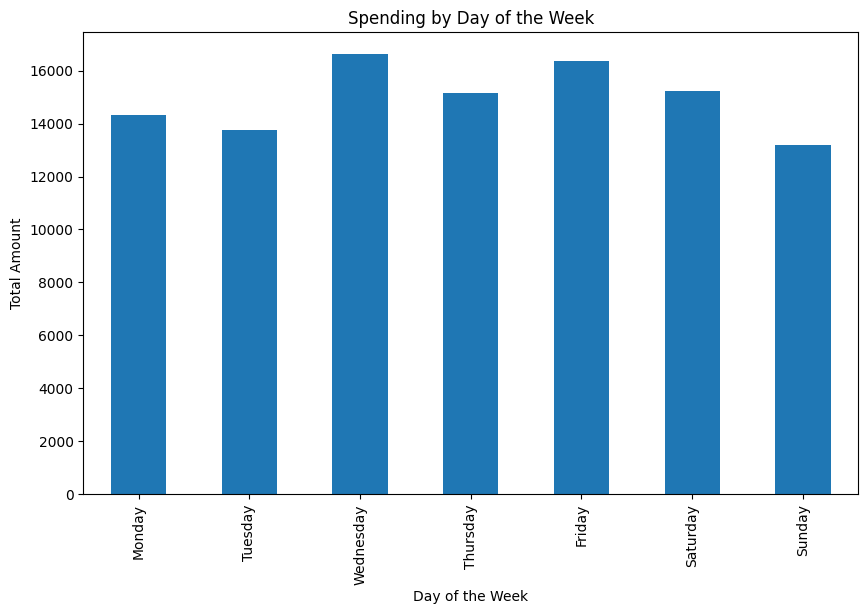

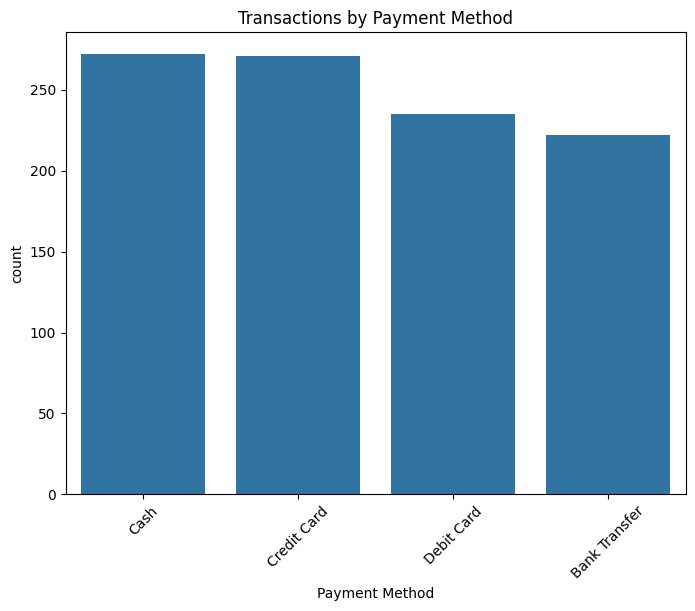

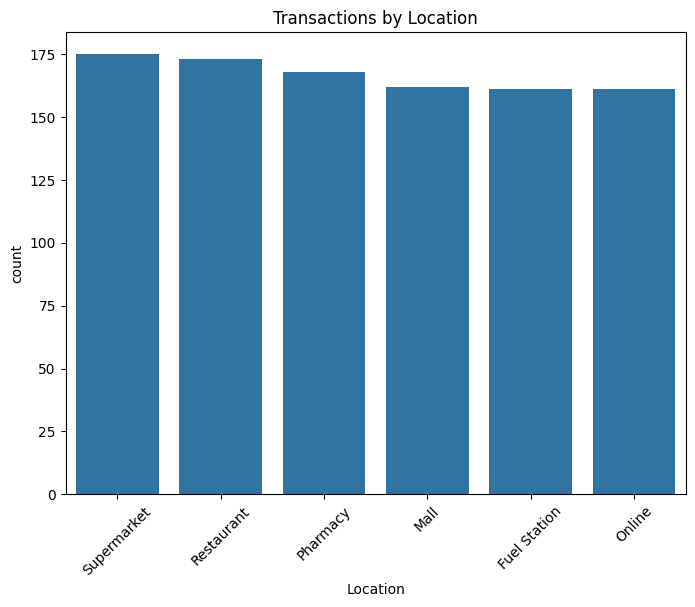

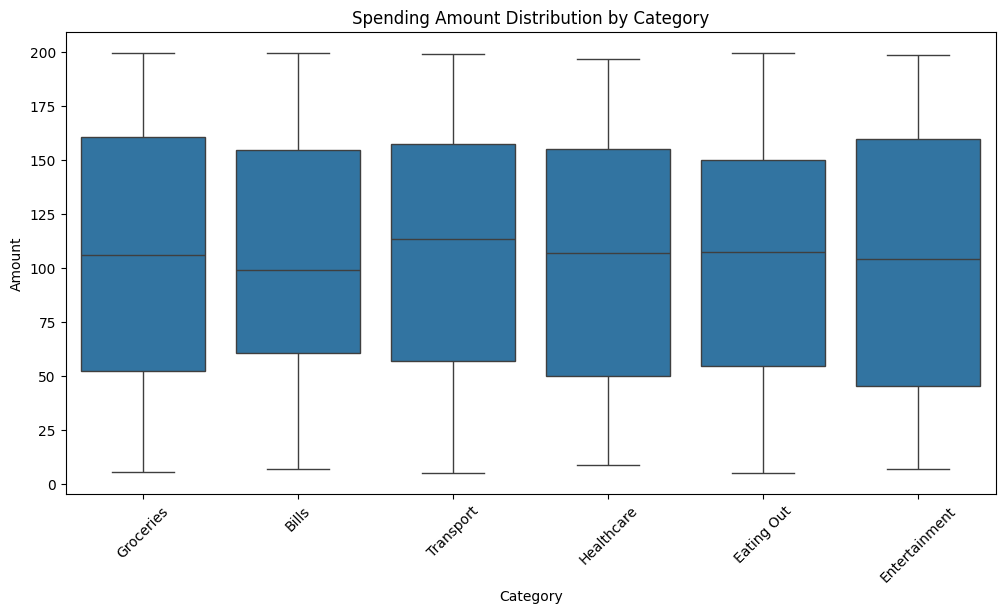

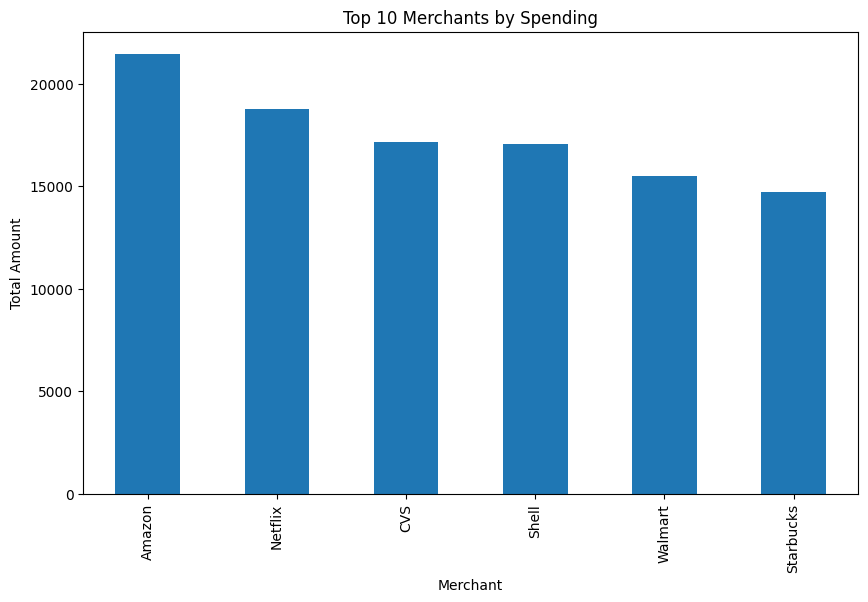

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("enhanced_personal_expense_data.csv")

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Convert "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Data Types
print("\nData Types:\n", df.dtypes)

# General summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Expenses by Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.title("Distribution of Transactions by Category")
plt.xticks(rotation=45)
plt.show()

# Monthly Spending Pattern
df["Month"] = df["Date"].dt.to_period("M")
monthly_spending = df.groupby("Month")["Amount"].sum()
monthly_spending.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Monthly Spending Pattern")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

# Day of Week Spending Pattern
df["Day of Week"] = df["Date"].dt.day_name()
day_of_week_spending = df.groupby("Day of Week")["Amount"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
day_of_week_spending.plot(kind="bar", figsize=(10, 6))
plt.title("Spending by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Amount")
plt.show()

# Payment Method Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Payment Method", order=df["Payment Method"].value_counts().index)
plt.title("Transactions by Payment Method")
plt.xticks(rotation=45)
plt.show()

# Location Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Location", order=df["Location"].value_counts().index)
plt.title("Transactions by Location")
plt.xticks(rotation=45)
plt.show()

# Category vs. Amount Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Category", y="Amount")
plt.title("Spending Amount Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Top Merchants by Spending
top_merchants = df.groupby("Merchant")["Amount"].sum().nlargest(10)
top_merchants.plot(kind="bar", figsize=(10, 6))
plt.title("Top 10 Merchants by Spending")
plt.xlabel("Merchant")
plt.ylabel("Total Amount")
plt.show()


Step 3: Expense Tracking and Categorization


In [3]:
# Daily expenses
daily_expenses = df.groupby("Date")["Amount"].sum().reset_index()

# Monthly expenses
df["Month"] = df["Date"].dt.to_period("M")
monthly_expenses = df.groupby("Month")["Amount"].sum().reset_index()

# Weekly expenses
df["Week"] = df["Date"].dt.to_period("W")
weekly_expenses = df.groupby("Week")["Amount"].sum().reset_index()

# Expenses per category
category_expenses = df.groupby("Category")["Amount"].sum().reset_index()

# Monthly expenses per category
monthly_category_expenses = df.groupby(["Month", "Category"])["Amount"].sum().unstack().fillna(0).reset_index()

# Yearly summary
total_expenses = df["Amount"].sum()
total_days = (df["Date"].max() - df["Date"].min()).days + 1
average_daily_expenses = total_expenses / total_days
yearly_summary = pd.DataFrame({
    "Total Expenses": [total_expenses],
    "Average Daily Expenses": [average_daily_expenses]
})

# Category breakdown per payment method
category_payment_expenses = df.groupby(["Category", "Payment Method"])["Amount"].sum().unstack().fillna(0).reset_index()

# Average expenses by day of the week
df["Day of Week"] = df["Date"].dt.day_name()
day_of_week_avg_expenses = df.groupby("Day of Week")["Amount"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

# Display summary tables
print("Daily Expenses:\n", daily_expenses.head())
print("\nMonthly Expenses:\n", monthly_expenses.head())
print("\nWeekly Expenses:\n", weekly_expenses.head())
print("\nExpenses per Category:\n", category_expenses)
print("\nMonthly Expenses per Category:\n", monthly_category_expenses.head())
print("\nYearly Summary:\n", yearly_summary)
print("\nCategory Breakdown per Payment Method:\n", category_payment_expenses)
print("\nAverage Expenses by Day of the Week:\n", day_of_week_avg_expenses)


Daily Expenses:
         Date  Amount
0 2022-01-01  254.41
1 2022-01-04  247.29
2 2022-01-08  233.24
3 2022-01-09    7.60
4 2022-01-12   91.07

Monthly Expenses:
      Month   Amount
0  2022-01  2480.98
1  2022-02  1791.43
2  2022-03  2237.73
3  2022-04  4664.01
4  2022-05  3557.73

Weekly Expenses:
                     Week  Amount
0  2021-12-27/2022-01-02  254.41
1  2022-01-03/2022-01-09  488.13
2  2022-01-10/2022-01-16  433.95
3  2022-01-17/2022-01-23  373.56
4  2022-01-24/2022-01-30  930.93

Expenses per Category:
         Category    Amount
0          Bills  17073.67
1     Eating Out  16990.80
2  Entertainment  16766.28
3      Groceries  17843.80
4     Healthcare  17454.39
5      Transport  18526.15

Monthly Expenses per Category:
 Category    Month   Bills  Eating Out  Entertainment  Groceries  Healthcare  \
0         2022-01  382.68      324.12         312.97     386.69      573.60   
1         2022-02  126.40      260.24         279.81     121.77      908.90   
2         2022-0

Step 4: Statistical and Trend Analysis

In [4]:
# Summary statistics for overall spending
summary_stats = df["Amount"].describe()
quartiles = df["Amount"].quantile([0.25, 0.5, 0.75])

# Analyze monthly trend
monthly_trend = monthly_expenses.set_index("Month")
monthly_trend["Rolling_Avg"] = monthly_trend["Amount"].rolling(window=3).mean()
monthly_trend["Rolling_Median"] = monthly_trend["Amount"].rolling(window=3).median()

# Calculate spending volatility (standard deviation) for each month
monthly_trend["Volatility"] = df.groupby("Month")["Amount"].std().values

# Month-over-Month Change
monthly_trend["MoM_Change"] = monthly_trend["Amount"].pct_change().fillna(0) * 100

# Display enhanced summary statistics and monthly trend analysis
print("Summary Statistics:\n", summary_stats)
print("\nQuartile Analysis:\n", quartiles)
print("\nMonthly Trend Analysis with Rolling Average, Median, Volatility, and MoM Change:\n", monthly_trend.head())


Summary Statistics:
 count    1000.000000
mean      104.655090
std        58.095937
min         5.070000
25%        54.900000
50%       105.985000
75%       156.255000
max       199.710000
Name: Amount, dtype: float64

Quartile Analysis:
 0.25     54.900
0.50    105.985
0.75    156.255
Name: Amount, dtype: float64

Monthly Trend Analysis with Rolling Average, Median, Volatility, and MoM Change:
           Amount  Rolling_Avg  Rolling_Median  Volatility  MoM_Change
Month                                                                
2022-01  2480.98          NaN             NaN   51.471458    0.000000
2022-02  1791.43          NaN             NaN   57.854807  -27.793453
2022-03  2237.73  2170.046667         2237.73   55.517148   24.913058
2022-04  4664.01  2897.723333         2237.73   65.179725  108.425950
2022-05  3557.73  3486.490000         3557.73   65.021418  -23.719503


Step 5: Predictive Modeling for Future Expenses

<ipython-input-5-62994e9cb9ab>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Amount'].resample('M').sum()


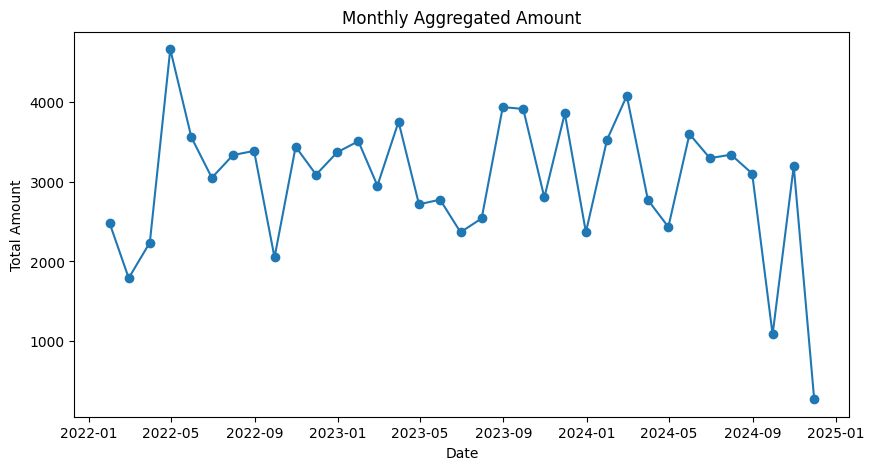

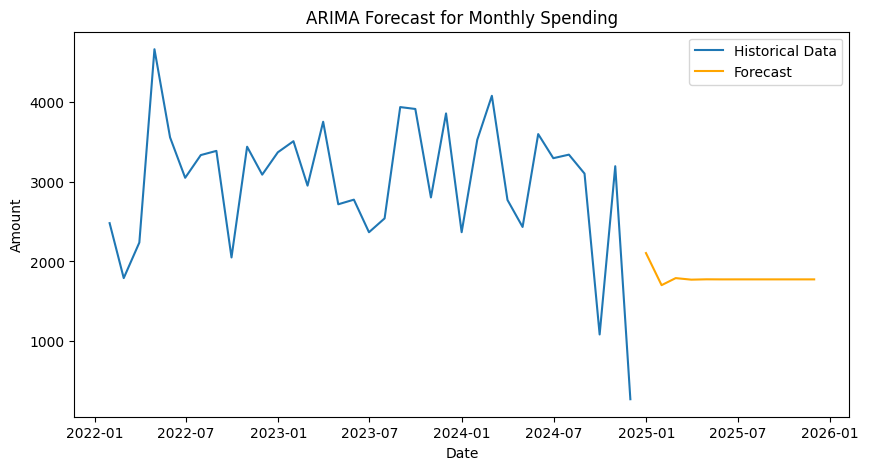

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -280.161
Date:                Sun, 10 Nov 2024   AIC                            566.321
Time:                        22:12:27   BIC                            570.900
Sample:                    01-31-2022   HQIC                           567.883
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2197      0.234     -0.937      0.349      -0.679       0.240
ma.L1         -0.5438      0.262     -2.078      0.038      -1.057      -0.031
sigma2      8.154e+05   1.61e+05      5.062      0.0

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/enhanced_personal_expense_data.csv'
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index and aggregate by month to sum up the Amount
df.set_index('Date', inplace=True)
monthly_data = df['Amount'].resample('M').sum()

# Plot the time series to inspect its structure
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, marker='o')
plt.title('Monthly Aggregated Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

# Fit ARIMA model (p, d, q) - start with (1, 1, 1) as a simple model
model = ARIMA(monthly_data, order=(1, 1, 1))
arima_model = model.fit()

# Forecast for the next 12 months
forecast = arima_model.forecast(steps=12)

# Plot forecasted values along with historical data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Historical Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast for Monthly Spending')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Print summary of ARIMA model
print(arima_model.summary())


<ipython-input-6-f7fedbc250f1>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Amount'].resample('M').sum()


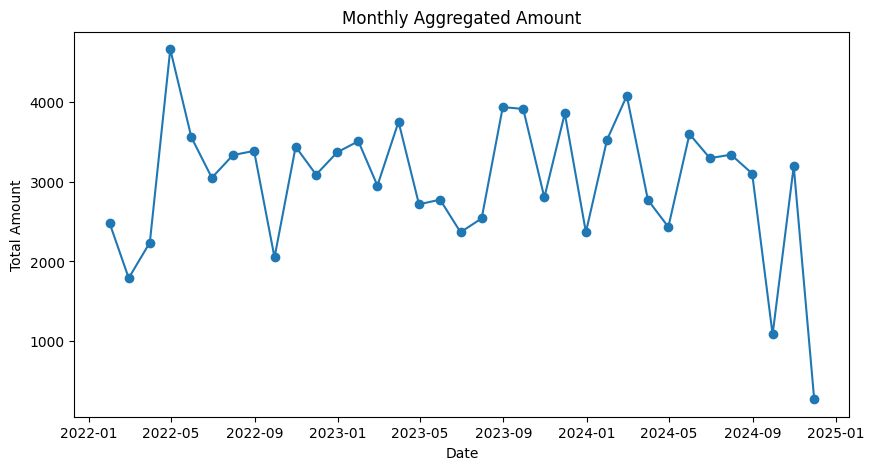

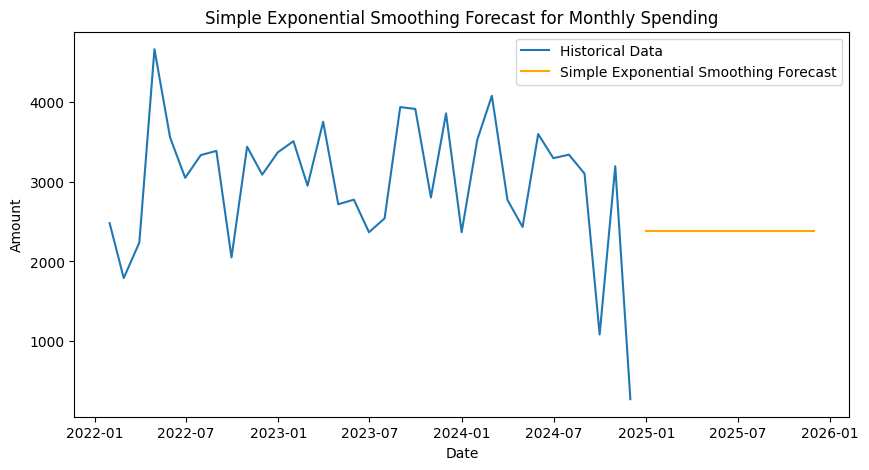

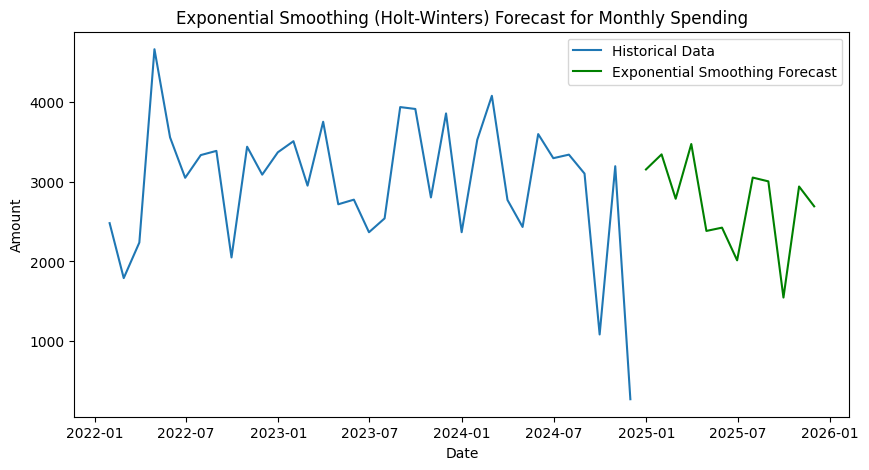

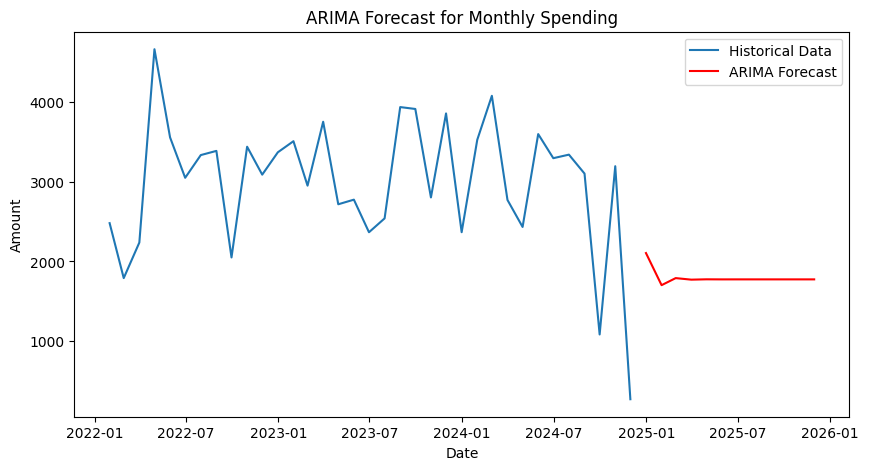

Simple Exponential Smoothing Summary:
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                 Amount   No. Observations:                   35
Model:             SimpleExpSmoothing   SSE                       27213804.408
Optimized:                       True   AIC                            478.736
Trend:                           None   BIC                            481.847
Seasonal:                        None   AICC                           480.069
Seasonal Periods:                None   Date:                 Sun, 10 Nov 2024
Box-Cox:                        False   Time:                         22:12:37
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1891860                alpha                 True
initial_level 

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/enhanced_personal_expense_data.csv'
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index and aggregate by month to sum up the Amount
df.set_index('Date', inplace=True)
monthly_data = df['Amount'].resample('M').sum()

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, marker='o')
plt.title('Monthly Aggregated Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

### Simple Exponential Smoothing
simple_exp_model = SimpleExpSmoothing(monthly_data).fit()
simple_exp_forecast = simple_exp_model.forecast(steps=12)

# Plot Simple Exponential Smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Historical Data')
plt.plot(simple_exp_forecast, label='Simple Exponential Smoothing Forecast', color='orange')
plt.title('Simple Exponential Smoothing Forecast for Monthly Spending')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

### Exponential Smoothing (Holt-Winters)
# This model allows us to add trend and seasonality components
exp_smoothing_model = ExponentialSmoothing(monthly_data, trend="add", seasonal="add", seasonal_periods=12).fit()
exp_smoothing_forecast = exp_smoothing_model.forecast(steps=12)

# Plot Exponential Smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Historical Data')
plt.plot(exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing (Holt-Winters) Forecast for Monthly Spending')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

### ARIMA Model
arima_model = ARIMA(monthly_data, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=12)

# Plot ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Historical Data')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Monthly Spending')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Print summaries for each model
print("Simple Exponential Smoothing Summary:")
print(simple_exp_model.summary())
print("\nExponential Smoothing (Holt-Winters) Summary:")
print(exp_smoothing_model.summary())
print("\nARIMA Model Summary:")
print(arima_model.summary())


<ipython-input-7-5d84cad3f367>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Amount'].resample('M').sum()


Root Mean Squared Error: 1766.11343656852


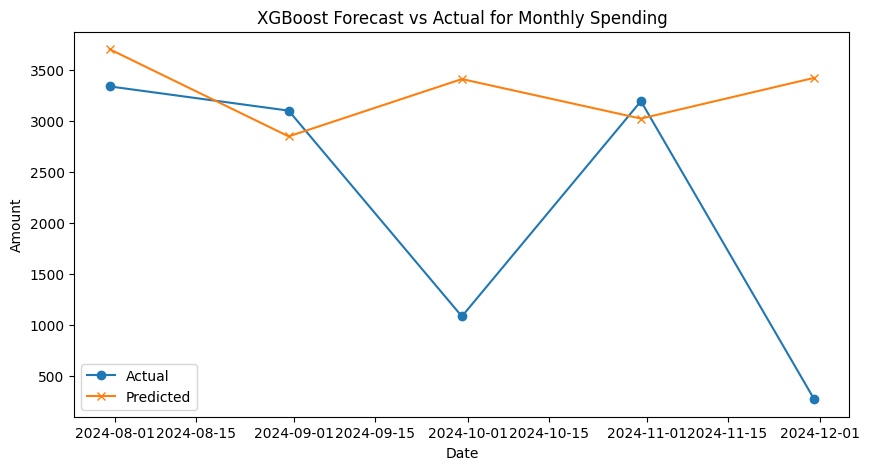

<ipython-input-7-5d84cad3f367>:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_values[0, -1] = next_pred  # Set the last column (most recent lag) to the new prediction
<ipython-input-7-5d84cad3f367>:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


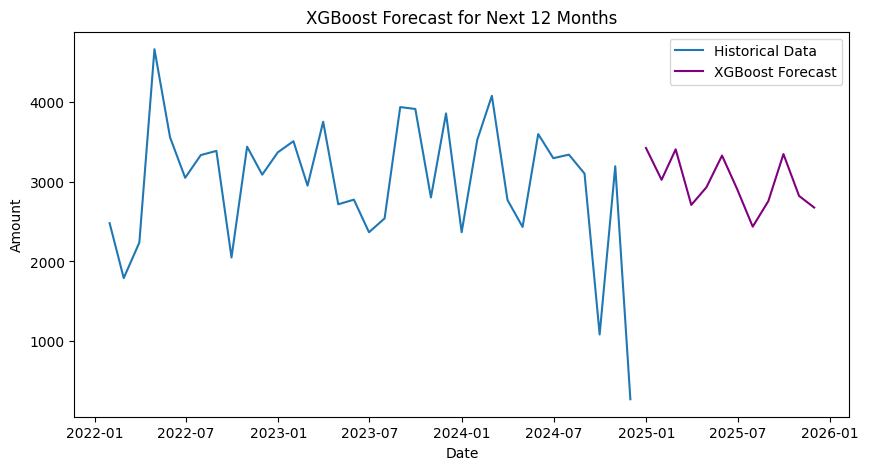

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/enhanced_personal_expense_data.csv'
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index and aggregate by month to sum up the Amount
df.set_index('Date', inplace=True)
monthly_data = df['Amount'].resample('M').sum()

# Function to create lagged features for supervised learning
def create_lagged_features(data, lag=12):
    df_lagged = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = df_lagged['Amount'].shift(i)
    df_lagged = df_lagged.dropna()
    return df_lagged

# Prepare the data with 12 lags
lagged_data = create_lagged_features(monthly_data)

# Separate features and target
X = lagged_data.drop('Amount', axis=1)
y = lagged_data['Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(monthly_data.index[-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(monthly_data.index[-len(y_test):], y_pred, label='Predicted', marker='x')
plt.title('XGBoost Forecast vs Actual for Monthly Spending')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Forecast for the next 12 months
# Prepare the latest data for forecasting
last_values = X.iloc[-1:].values  # Get the last observed values to start the prediction

forecast = []
for i in range(12):
    next_pred = xgb_model.predict(last_values)
    forecast.append(next_pred[0])

    # Update last_values with the new prediction (rolling window)
    last_values = np.roll(last_values, -1)
    last_values[0, -1] = next_pred  # Set the last column (most recent lag) to the new prediction

# Create date range for forecast
forecast_dates = pd.date_range(monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot forecasted values
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Historical Data')
plt.plot(forecast_dates, forecast, label='XGBoost Forecast', color='purple')
plt.title('XGBoost Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


6. Data Visualization and Dashboards

In [9]:
!pip install plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.2 MB/s eta 0:00:00


In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Load the dataset
file_path = '/content/enhanced_personal_expense_data.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate by month for monthly trend visualization
monthly_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_trend['Date'] = monthly_trend['Date'].dt.to_timestamp()

# Aggregate by category for expense distribution
category_expenses = df.groupby('Category')['Amount'].sum().reset_index()

# Aggregate by day for daily trend visualization
daily_expenses = df.groupby('Date')['Amount'].sum().reset_index()

# Create cumulative amount for cumulative line plot
df['Cumulative Amount'] = df['Amount'].cumsum()

# Define the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Personal Expense Dashboard", style={'text-align': 'center'}),

    # Monthly Expense Trend with interactive line plot
    dcc.Graph(id="monthly-trend",
              figure=px.line(monthly_trend, x="Date", y="Amount", title="Monthly Expense Trend")
              .update_traces(line_shape="spline", line=dict(width=3))),

    # Expense by Category with interactive pie chart
    dcc.Graph(id="category-expenses",
              figure=px.pie(category_expenses, values="Amount", names="Category", title="Expenses by Category")
              .update_traces(textinfo='percent+label', hole=0.4)),

    # Daily Expense Tracker with range slider
    dcc.Graph(id="daily-expenses",
              figure=px.bar(daily_expenses, x="Date", y="Amount", title="Daily Expense Tracker")
              .update_xaxes(rangeslider_visible=True)),

    # Cumulative Expense Over Time
    dcc.Graph(id="cumulative-expenses",
              figure=px.line(df, x='Date', y='Cumulative Amount', title="Cumulative Expenses Over Time")
              .update_traces(line_shape="spline", line=dict(width=2))),

    # Dropdown for filtering by category
    html.Div([
        html.Label("Filter by Category:"),
        dcc.Dropdown(id="category-filter",
                     options=[{'label': cat, 'value': cat} for cat in df['Category'].unique()],
                     value=None, clearable=True)
    ], style={'width': '30%', 'display': 'inline-block', 'margin': '20px'}),

    # Heatmap of spending per day of the week vs. time of day (if available)
    dcc.Graph(id="heatmap-weekday-time"),

    # Expense by Merchant with bubble chart
    dcc.Graph(id="merchant-expenses",
              figure=px.scatter(df, x="Merchant", y="Amount", size="Amount", color="Category",
                                title="Expenses by Merchant", hover_name="Merchant", log_x=True,
                                size_max=60)),

    # Quarterly Spending Summary
    dcc.Graph(id="quarterly-expenses", figure=go.Figure()),

    # Monthly Seasonality Analysis
    dcc.Graph(id="seasonality-analysis", figure=go.Figure()),

    # Top Merchants
    dcc.Graph(id="top-merchants", figure=go.Figure()),
])

# Callback to update dashboard visuals based on selected category filter
@app.callback(
    [Output('monthly-trend', 'figure'),
     Output('category-expenses', 'figure'),
     Output('daily-expenses', 'figure'),
     Output('heatmap-weekday-time', 'figure'),
     Output('quarterly-expenses', 'figure'),
     Output('seasonality-analysis', 'figure'),
     Output('top-merchants', 'figure')],
    [Input('category-filter', 'value')]
)
def update_dashboard(selected_category):
    # Filter the data based on the selected category
    if selected_category:
        filtered_df = df[df['Category'] == selected_category]
    else:
        filtered_df = df

    # Update Monthly Trend
    monthly_data = filtered_df.groupby(filtered_df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
    monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
    monthly_trend_fig = px.line(monthly_data, x="Date", y="Amount", title="Monthly Expense Trend (Filtered)")
    monthly_trend_fig.update_traces(line_shape="spline", line=dict(width=3))

    # Update Category Expense Pie
    category_data = filtered_df.groupby('Category')['Amount'].sum().reset_index()
    category_expenses_fig = px.pie(category_data, values="Amount", names="Category", title="Expenses by Category (Filtered)")
    category_expenses_fig.update_traces(textinfo='percent+label', hole=0.4)

    # Update Daily Expense Bar
    daily_data = filtered_df.groupby('Date')['Amount'].sum().reset_index()
    daily_expenses_fig = px.bar(daily_data, x="Date", y="Amount", title="Daily Expense Tracker (Filtered)")
    daily_expenses_fig.update_xaxes(rangeslider_visible=True)

    # Generate a heatmap for spending based on Day of Week and Hour (if Hour available)
    if 'Day of Week' in filtered_df.columns and 'Time' in filtered_df.columns:
        filtered_df['Hour'] = pd.to_datetime(filtered_df['Time'], errors='coerce').dt.hour
        heatmap_data = filtered_df.pivot_table(index='Day of Week', columns='Hour', values='Amount', aggfunc='sum')
        heatmap_fig = px.imshow(heatmap_data, labels=dict(color="Spending Amount"), title="Spending Heatmap by Day of Week and Hour")
    else:
        heatmap_data = filtered_df.groupby('Day of Week')['Amount'].sum().reindex(
            ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
        heatmap_fig = px.bar(heatmap_data, title="Spending by Day of Week")

    # Quarterly Spending Summary
    filtered_df['Quarter'] = filtered_df['Date'].dt.to_period("Q")
    quarterly_trend = filtered_df.groupby(['Quarter', 'Category'])['Amount'].sum().unstack().fillna(0)
    quarterly_fig = px.bar(quarterly_trend, x=quarterly_trend.index.astype(str), y=quarterly_trend.columns,
                           title="Quarterly Spending Summary by Category", barmode='stack')

    # Monthly Seasonality Analysis
    filtered_df['Month'] = filtered_df['Date'].dt.month_name()
    monthly_seasonality = filtered_df.groupby('Month')['Amount'].sum().reindex(
        ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"])
    seasonality_fig = px.line_polar(monthly_seasonality, r='Amount', theta=monthly_seasonality.index,
                                    line_close=True, title="Monthly Expense Seasonality")

    # Top Merchants
    top_merchants = filtered_df.groupby('Merchant')['Amount'].sum().nlargest(10).reset_index()
    top_merchants_fig = px.bar(top_merchants, x='Merchant', y='Amount', title="Top 10 Merchants by Spending")

    return monthly_trend_fig, category_expenses_fig, daily_expenses_fig, heatmap_fig, quarterly_fig, seasonality_fig, top_merchants_fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>